<a href="https://colab.research.google.com/github/antontmoore/graph_search_algorithms/blob/master/Algorithms_on_graphs_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Depth-First Search, Breadth-First Search, Dijkstra's algorithm and A* are actually the same algorithm.

In algorithmic problems involving graphs, we use several well-known algorithms. Two of them are graph traversal algorithms: Breadth First Search and Depth First Search. And two more, A* and Dijkstra's algorithm, are used when we want to find the optimal path from one node to another within a graph.

In this tutorial, I will show that all of these four algorithms are the one algorithm, and the difference between them is only achieved through the different data structures used to store the unvisited nodes of the graph.

# Import

Clone the code from github repository and step inside the project directory.

In [ ]:
!git clone https://github.com/antontmoore/graph_search_algorithms


import os
if os.getcwd() == '/content':
  os.chdir('graph_search_algorithms')

Cloning into 'graph_search_algorithms'...
remote: Enumerating objects: 140, done.
remote: Counting objects: 100% (140/140), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 140 (delta 72), reused 83 (delta 39), pack-reused 0
Receiving objects: 100% (140/140), 1.43 MiB | 11.98 MiB/s, done.
Resolving deltas: 100% (72/72), done.


Import all the necessary stuff.

In [ ]:
from networkx import Graph
from utils import generate_simple_graph, generate_maze_graph, print_path
from utils.graph_animation import GraphAnimator
from utils.data_structures import AbstractNodeStorageClass
from utils.data_structures import Stack, Queue, DijkstraQueue, AStarQueue
from heapq import heappush, heappop
from math import sqrt

# Finding a path inside simple graph

First, we consider the problem of path finding within a small simple graph shown in the figure. Moving from node to node, we want to find a path from the node labeled "*start*" to the node labeled "*target*".

In [ ]:
# Building small simple graph
graph, start_node, target_node = generate_simple_graph()

# Create helper class for pretty animations and make a first shot
graph_animator = GraphAnimator(graph, start_node, target_node)
fig = graph_animator.make_one_shot()
fig.show()   

# The one and only algorithm

Here is a general graph traversal algorithm. As we will see below, it acts differently depending on which data structure it uses.

In [ ]:
def find_path(
        graph: Graph,
        start_node: int,
        target_node: int,
        nodes_storage_structure_name: str,
        animator: GraphAnimator
    ):
    """
        Universal algorithm for traversing graph searching the path from 
        start_node to target_node.
        It uses graph structure and the auxilary node storage structure.
        The animator is used to create animations of the search process.
    """

    color = ['white'] * graph.number_of_nodes()      # coloring all nodes to white
    dist = [float('Inf')] * graph.number_of_nodes()  # the distances to all the nodes at the start are infinity
    parent = dict()                                  # dictionary {node : its parent}

    nodes_storage = {
        'Stack': Stack(),
        'Queue': Queue(),
        'DijkstraQueue': DijkstraQueue(dist),
        'AStarQueue': AStarQueue(graph, dist, target_node)
    }[nodes_storage_structure_name]

    # place the start node to the storage
    nodes_storage.insert(start_node)
    dist[start_node] = 0
    animator.add_frame(color, parent, start_node, nodes_storage)

    # Loop until there are nodes in storage
    while not nodes_storage.is_empty():
        current_node = nodes_storage.get_first()

        if current_node == target_node:
            # End of the search, the target is found.
            print_path(target_node, parent)
            animator.add_frame(color, parent, current_node, nodes_storage)
            break

        # take all the neighbours of the current node
        neighbours = list(graph.adj[current_node])
        for node_to_go in neighbours:
            if color[node_to_go] == 'white':            # if this neighbour is new to us
                color[node_to_go] = 'grey'              # paint in grey
                parent[node_to_go] = current_node       # saving the parent (where we came from)
                dist[node_to_go] = dist[current_node] + \
                  graph.get_edge_data(node_to_go, current_node)['weight']
                nodes_storage.insert(node_to_go)  # add to node storage
            else:
                # Otherwise we have to solve the conflict of duplicates
                # comparing the distance from the current node to the neighbor
                # with the distance to it along the previously found path
                weight_from_current_node = graph.get_edge_data(node_to_go, current_node)['weight']
                if dist[current_node] + weight_from_current_node < dist[node_to_go]:
                    dist[node_to_go] = dist[current_node] + weight_from_current_node

        # painting the current node in black, we won't come back here
        color[current_node] = 'black'
        animator.add_frame(color, parent, current_node, nodes_storage)

    animator.make_animation_with_storage(color, parent, target_node, nodes_storage)


# Depth-First Search

If we use a `Stack` as a `nodes_storage`, then the algorithm written above turns into a depth-first search.

Let's check. Below is the class implementing the storage of unvisited nodes according to the Stack principle, i.e. get_first method returns the element added the last.

In [ ]:
class Stack(AbstractNodeStorageClass):
    """
        Simple stack works on a LIFO (Last In, First Out) principle
    """
    def __init__(self):
        self.nodes = []

    def get_first(self):
        return self.nodes.pop()

    def insert(self, node_number):
        self.nodes.append(node_number)

    def is_empty(self):
        return len(self.nodes) == 0

And the result of using this class is shown below. 

In [ ]:
# DFS on simple graph
find_path(graph, 
          start_node, 
          target_node, 
          'Stack', 
          GraphAnimator(graph, start_node, target_node))

0 -> 2 -> 4 -> 8 -> 12 -> 11 -> 10


The animation shows that on each iteration we are digging as deep as possible looking for the target node.

# Breadth-First Search

In order for the search to be performed in breadth, you need to use a `Queue` instead of a `Stack`.

In [ ]:
class Queue(AbstractNodeStorageClass):
    """
        Simple queue works on a FIFO (First In, First Out) principle
    """

    def __init__(self):
        self.nodes = []

    def get_first(self):
        return self.nodes.pop(0)

    def insert(self, node_number):
        self.nodes.append(node_number)

    def is_empty(self):
        return len(self.nodes) == 0

The only difference with the `Stack` is taking the first element with `pop(0)` function instead of taking the last one using `pop()`. The result is shown below.

In [ ]:
# BFS on simple graph
find_path(graph, 
          start_node, 
          target_node, 
          'Queue', 
          GraphAnimator(graph, start_node, target_node))

0 -> 1 -> 3 -> 6 -> 10


Notice how instead of going deeper with each new node, we now go through all the nodes located on the same horizontal, i.e. iterate over the nodes as widely as possible. And also notice, how target node going through the queue.

# Dijkstra's algorithm

Initially, Dijkstra's algorithm was designed to find the shortest path to a given node (and, at the same time, to all the others), starting from some initial node. 

We will slightly complicate our current task. Namely, we will add a weight to each edge of the graph. Now let's try to find a path inside the graph such that the sum of the weights of the edges included in this path is minimal.

In [ ]:
class DijkstraQueue(AbstractNodeStorageClass):
    """
        Priority queue for Dijkstra's method.
        In the get_first() method, it selects a node,
        with a minimal distance from the start node,
        using heap datastructure.
    """

    def __init__(self, distances):
        self.nodes = []
        self.distances = distances

    def get_first(self):
        closest_node_distance, closest_node = heappop(self.nodes)
        return closest_node

    def insert(self, element):
        heappush(self.nodes, (self.distances[element], element))

    def is_empty(self):
        return len(self.nodes) == 0

In [ ]:
graph_animator = GraphAnimator(graph, start_node, target_node,
                               show_edge_weight=True, show_controls=True)
find_path(graph, start_node, target_node, 'DijkstraQueue', graph_animator)

0 -> 2 -> 4 -> 7 -> 11 -> 10


It is interesting to note that in three cases we obtained three different paths within the same graph using the same algorithm.

# Finding a way out of the maze

Before we go further, it's time to complicate our task even more and replace a simple graph with a maze. The start and target nodes are the entrance and exit of the maze respectively, and the the rest of the available space is filled with graph nodes. Our goal is to find a path from the entrance to the exit through the graph. 

And right away, let's see how Dijkstra's algorithm solves this problem. Without changing either the algorithm or the data structure from the previous paragraph, we feed a new graph as input.

In [ ]:
# generate big maze graph
graph, start_node, target_node, maze_list = generate_maze_graph()
graph_animator = GraphAnimator(graph, start_node, target_node,
                               is_maze=True, maze_list=maze_list,
                               show_datastructure=False)

# Dijkstra algorithm on large graph
find_path(graph, 
          start_node, 
          target_node, 
          'DijkstraQueue', 
          GraphAnimator(graph, start_node, target_node,
                        is_maze=True, maze_list=maze_list,
                        show_datastructure=False))

113 -> 114 -> 115 -> 116 -> 117 -> 118 -> 132 -> 147 -> 158 -> 159 -> 160 -> 161 -> 162 -> 179 -> 192 -> 207 -> 208 -> 209 -> 210 -> 211 -> 212 -> 213 -> 193 -> 194 -> 195 -> 196 -> 197 -> 198


We see how the algorithm iterates over the nodes sequentially, with each next node being selected according to the principle of priority queue - every node taken from the storage is the closest to the start one.

Using this approach, we have to iterate over almost all the nodes in the maze. Although intuitively it seems that we can do better if we aim towards the target node. It was this kind of reasoning that led to the creation of the A* algorithm.

# A* algorithm

Algorithm A*, in addition to the distance to the start node (which is calculated along the path shown in green), also takes into account a rough estimate of the distance to the target node. This approximate estimate is calculated as the Euclidean distance from the selected node to the target one. The only change we need to make is the calculation of the node's priority within the priority queue. Here is the code:

In [ ]:
class AStarQueue(AbstractNodeStorageClass):
    """
        Priority queue for AStar method.
        In the get_first() method, a node is selected that has the minimum distance to the start node
        and the minimum estimate (according to heuristics) to the end node.
    """

    def __init__(self, graph, distances, goal_node):
        self.nodes = []
        self.graph = graph
        self.x_goal, self.y_goal = graph.nodes[goal_node]['position']
        self.distances = distances

    def calc_heuristic(self, node):
        x_node, y_node = self.graph.nodes[node]['position']
        estimated_distance_to_goal = sqrt(
            (x_node - self.x_goal) ** 2 +
            (y_node - self.y_goal) ** 2
        )
        return estimated_distance_to_goal

    def get_first(self):
        optimal_node_value, optimal_node = heappop(self.nodes)
        return optimal_node

    def insert(self, element):
        heappush(self.nodes,
                 (self.distances[element] +
                  self.calc_heuristic(element), element)
                 )

    def is_empty(self):
        return len(self.nodes) == 0

In [ ]:
# A* algorithm on maze graph
find_path(graph, 
          start_node, 
          target_node, 
          'AStarQueue', 
          GraphAnimator(graph, start_node, target_node,
                        is_maze=True, maze_list=maze_list,
                        show_datastructure=False))

113 -> 114 -> 115 -> 116 -> 117 -> 118 -> 132 -> 147 -> 158 -> 159 -> 160 -> 161 -> 162 -> 179 -> 192 -> 207 -> 208 -> 209 -> 210 -> 211 -> 212 -> 213 -> 214 -> 215 -> 216 -> 217 -> 197 -> 198


Note that due to heuristics, the A* algorithm finds the correct answer faster (80 steps instead of 203).

# Instead of conclusion

It was shown above that for the problem of finding a path in a graph, four different classical algorithms can be applied. Moreover, in this case they turn into one algorithm and all the difference between them is only in the data structure used. The table below summarizes this idea.
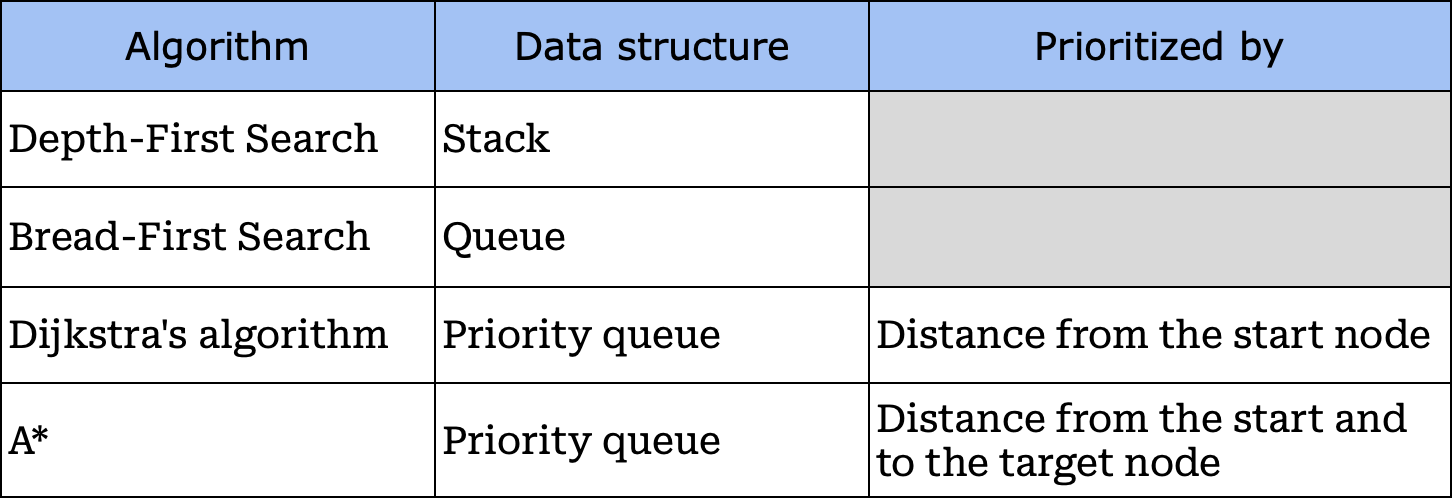

That's it.

Thanks for reading.